In [1]:
# Importing libraries and APIs
import numpy as np
import pandas as pd 
import yfinance as yf
from datetime import datetime, timedelta

In [2]:
# FINDING TICKERS FOR EVERY STOCK THAT WILL BE USED
tickers = ['AAPL', 'MSFT', 'JNJ', 
           'TSLA', 'NVDA', 'PG', 
           'KO', 'BABA', 'TCEHY', 
           'SPY', 'VTI']

- STOCKS USED IN THIS PROJECT
    - Apple (AAPL)
    - Microsoft (MSFT)
    - Johnson & Johnson (JNJ)
    - Tesla (TSLA)
    - Nvidia (NVDA)
    - Procter and Gamble Co (PG)
    - Coca-Cola Co (KO)
    - Alibaba (BABA)
    - Tencent Holdings (TCEHY)
    - S&P 500 ETF (SPY)
    - Vanguard Total Stock Market (VTI)

In [3]:
# SETTING END DATE
end_date = datetime.today()
print(end_date)

2024-10-10 15:25:00.160312


In [4]:
# SETTING START DATE 5 YEARS FROM NOW
start_date = end_date - timedelta(days = 5*365)
print(start_date)

2019-10-12 15:25:00.160312


In [5]:
# CREATING A DATAFRAME FOR ADJUSTED CLOSE PRICES
adj_close_df = pd.DataFrame()

In [6]:
# DOWNLOADING PRICES FOR EACH TICKER
for ticker in tickers:
    data = yf.download(ticker, start = start_date, end = end_date)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
print(adj_close_df)

                  AAPL        MSFT         JNJ        TSLA        NVDA  \
Date                                                                     
2019-10-14   57.059547  133.291153  113.913155   17.130667    4.640679   
2019-10-15   56.926495  135.220581  115.760590   17.192667    4.885488   
2019-10-16   56.696682  134.112595  117.791000   17.316668    4.831748   
2019-10-17   56.916828  133.424896  118.662430   17.464666    4.833739   
2019-10-18   57.190182  131.247147  111.281433   17.129999    4.739198   
...                ...         ...         ...         ...         ...   
2024-10-04  226.800003  416.059998  160.289993  250.080002  124.919998   
2024-10-07  221.690002  409.540009  159.529999  240.830002  127.720001   
2024-10-08  225.770004  414.709991  159.690002  244.500000  132.889999   
2024-10-09  229.539993  417.459991  160.649994  241.050003  132.649994   
2024-10-10  228.770004  415.160004  160.404999         NaN         NaN   

                    PG         KO    

# Calculate Lognormal Returns

## calculating log returns for each ticker

In [8]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))

## Dropping missing values

In [9]:
log_returns = log_returns.dropna()

# Calculating covariance matrix

In [10]:
cov_matrix = log_returns.cov()*252
print(cov_matrix)

           AAPL      MSFT       JNJ      TSLA      NVDA        PG        KO  \
AAPL   0.100516  0.072213  0.023369  0.104611  0.104470  0.028061  0.029072   
MSFT   0.072213  0.091960  0.023126  0.092324  0.111881  0.028722  0.027752   
JNJ    0.023369  0.023126  0.039303  0.011759  0.016898  0.025130  0.023861   
TSLA   0.104611  0.092324  0.011759  0.433179  0.171197  0.015085  0.024465   
NVDA   0.104470  0.111881  0.016898  0.171197  0.284416  0.026444  0.024627   
PG     0.028061  0.028722  0.025130  0.015085  0.026444  0.043868  0.028675   
KO     0.029072  0.027752  0.023861  0.024465  0.024627  0.028675  0.043409   
BABA   0.050016  0.044801  0.011344  0.099503  0.084172  0.013084  0.013437   
TCEHY  0.046256  0.044358  0.009107  0.088540  0.079068  0.011505  0.012022   
SPY    0.052852  0.052305  0.021641  0.070619  0.078690  0.024315  0.028042   
VTI    0.053421  0.052842  0.021404  0.074831  0.080598  0.023882  0.028076   

           BABA     TCEHY       SPY       VTI  
AAP

# Defining Portfolio Perfomance Metrics

## Calculating portfolio std

In [11]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

## Calculating expected return

In [12]:
def excepted_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)*252

## Calculating Sharpe Ratio

In [13]:
def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return(excepted_return(weights, log_returns) - risk_free_rate) / standard_deviation(weights, cov_matrix)

# Portfolio Optimization

## Setting Risk Free Rate

In [14]:
# Importing FRED API
from fredapi import Fred 

fred = Fred(api_key = '9ced124c5a728e16342d9fcf66ab176d')
ten_year_treasury_rate = fred.get_series_latest_release('GS10') / 100

# Setting risk free rate
risk_free_rate = ten_year_treasury_rate.iloc[-1]
print(risk_free_rate)



0.037200000000000004


## Using negative sharpe ratio

In [15]:
def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

## Setting contraints and bounds

In [16]:
constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.5) for _ in range(len(tickers))]

## Set intial weights

In [17]:
intial_weights = np.array([1/len(tickers)]*len(tickers))
print(intial_weights)

[0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]


## Optimizing weights to maximuze Sharpe Ratio

In [18]:
from scipy.optimize import minimize

In [19]:
optimized_results = minimize(neg_sharpe_ratio, intial_weights, args = (log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)

## Get the optimal weights

In [20]:
optimal_weights = optimized_results.x

# Vizualing

## Displaying analytics

In [21]:
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:4f}")

print()

optimal_portfolio_return = excepted_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:4f}")

Optimal Weights:
AAPL: 0.106929
MSFT: 0.000000
JNJ: 0.090495
TSLA: 0.139822
NVDA: 0.500000
PG: 0.162754
KO: 0.000000
BABA: 0.000000
TCEHY: 0.000000
SPY: 0.000000
VTI: 0.000000

Expected Annual Return: 0.462270
Expected Volatility: 0.359762
Sharpe Ratio: 1.181533


- Expected return is 46%
- Expected risk is 35%
- Sharpe Ratio is 1.18

In [26]:
# Converting np.array to dictionary
optimal_weights_dict = {ticker: weight for ticker, weight in zip(tickers, optimal_weights)}

# Creating a function to allocate a certain amount of money to each stock
def allocate_calculation(optimal_weights, total_investment):
    allocation = {ticker: weight * total_investment for ticker, weight in optimal_weights.items()}
    return allocation

# Total amount invested
total_investment = 1000000

# Calling the function
allocations = allocate_calculation(optimal_weights_dict, total_investment)

# Vizualizing results
for ticker, allocation in allocations.items():
    print(f"{ticker}: ${allocation:,.2f}")

# Sum the total allocation
total_allocated = sum(allocations.values())
print(f"Total Allocated: ${total_allocated:,.2f}")

AAPL: $106,929.41
MSFT: $0.00
JNJ: $90,495.06
TSLA: $139,821.74
NVDA: $500,000.00
PG: $162,753.78
KO: $0.00
BABA: $0.00
TCEHY: $0.00
SPY: $0.00
VTI: $0.00
Total Allocated: $1,000,000.00


## Plotting

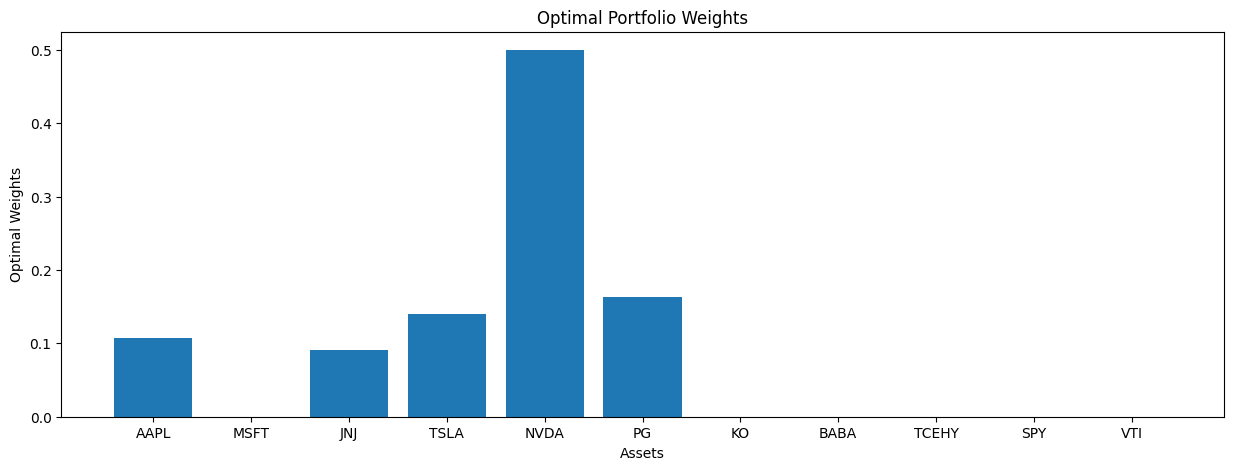

In [22]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,5))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()

## Plotting the Efficient Frontier

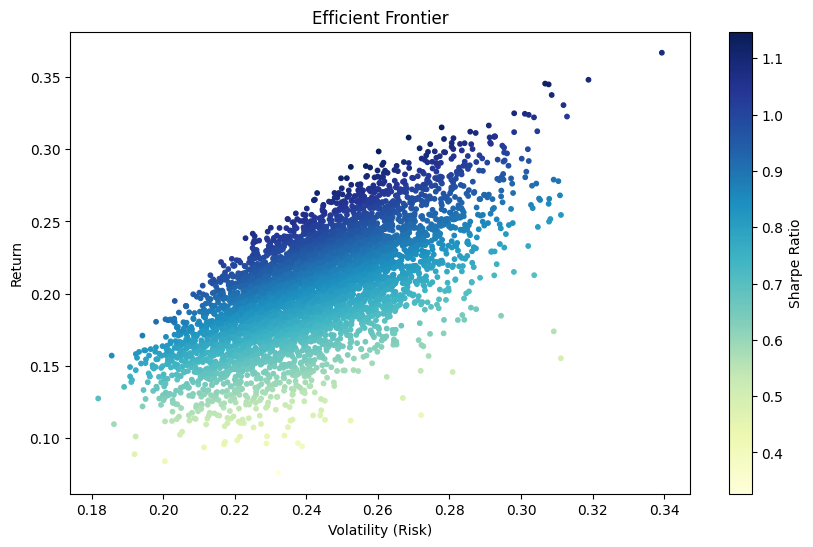

In [23]:
# Number of portfolios to simulate
num_portfolios = 5000

# Create arrays to store portfolio metrics
results = np.zeros((3, num_portfolios))
weights_record = []

# Loop to generate random portfolios
for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize so the sum of weights is 1
    weights_record.append(weights)

    # Expected portfolio return
    portfolio_return = np.sum(weights * log_returns.mean()) * 252

    # Portfolio volatility (risk)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Sharpe ratio (assuming risk-free rate is 0 for simplicity)
    sharpe_ratio = portfolio_return / portfolio_stddev

    # Store the results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = sharpe_ratio

# Plotting the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu', marker='o', s=10)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.show()


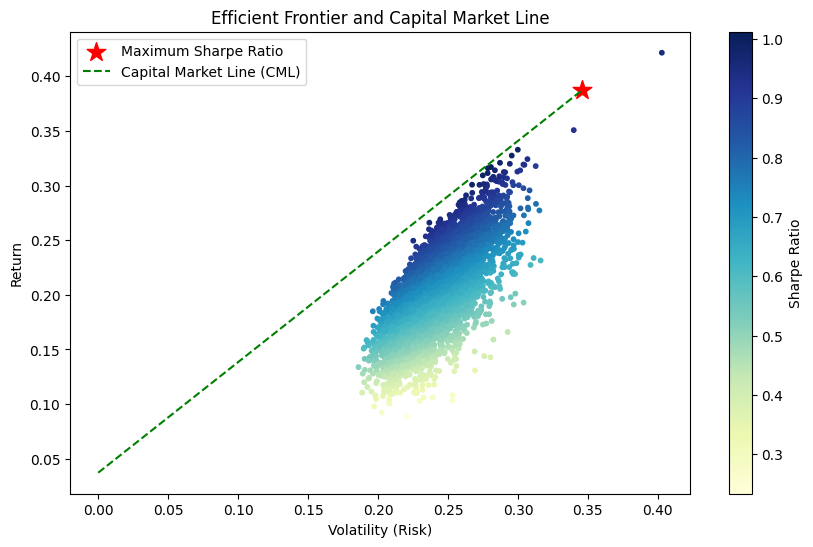

In [24]:


# Number of portfolios to simulate
num_portfolios = 5000

# Create arrays to store portfolio metrics
results = np.zeros((3, num_portfolios))
weights_record = []

# Loop to generate random portfolios
for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize so the sum of weights is 1
    weights_record.append(weights)

    # Expected portfolio return
    portfolio_return = np.sum(weights * log_returns.mean()) * 252

    # Portfolio volatility (risk)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Sharpe ratio (assuming risk-free rate is 0 for simplicity)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev

    # Store the results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = sharpe_ratio

# Find the index of the portfolio with the highest Sharpe Ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]

# Plotting the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu', marker='o', s=10)
plt.colorbar(label='Sharpe Ratio')

# Highlight the portfolio with the maximum Sharpe Ratio
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='red', marker='*', s=200, label='Maximum Sharpe Ratio')

# Plot the Capital Market Line (CML)
# Risk-free rate is assumed to be calculated or known
cml_x = np.linspace(0, max_sharpe_volatility, 100)
cml_y = risk_free_rate + (max_sharpe_return - risk_free_rate) / max_sharpe_volatility * cml_x
plt.plot(cml_x, cml_y, label='Capital Market Line (CML)', color='green', linestyle='--')

plt.title('Efficient Frontier and Capital Market Line')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.legend()
plt.show()


- A problem seems to be showing up in the efficient frontier graph since the points seem to be showing a positive linear correlation between risk and return
- This could be due to the stocks in the portfolio being highly correlated to each other, but further analysis is needed to explain this scenario

## Checking how correlated the stocks are to each other

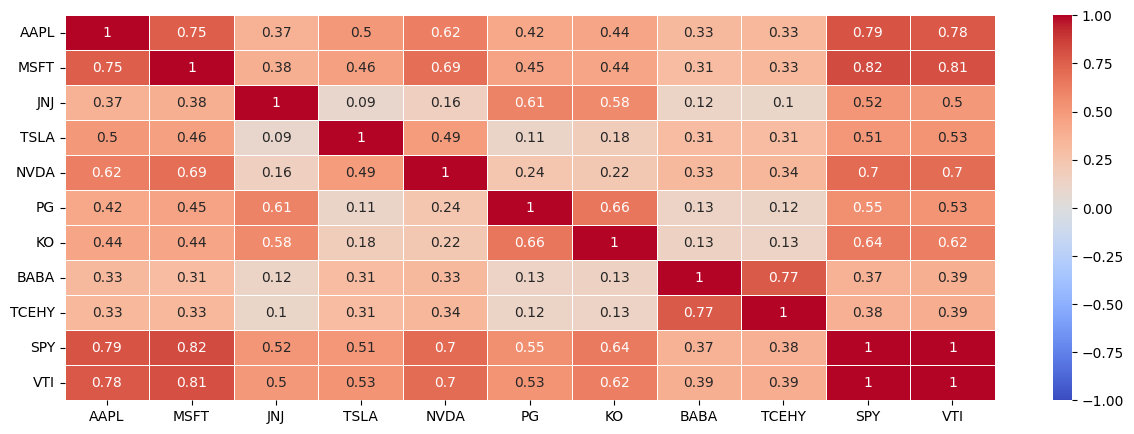

In [25]:
import seaborn as sns

correlation_matrix = log_returns.corr()

plt.figure(figsize=(15,5))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.show()

- As previsouly hypothesized, the stocks tend to be highly correlated to one another
- Next steps now would be to create a more diverse profile to see if the efficient frontier follows a more predicted shape than what is shown above